# Báo cáo Dự đoán với Hồi quy Tuyến tính bằng Gradient Descent

## 1. Giới thiệu
Trong bài báo cáo này, chúng tôi sử dụng phương pháp Gradient Descent để xây dựng một mô hình hồi quy tuyến tính nhằm dự đoán nhãn từ một tập dữ liệu cụ thể. Tập dữ liệu này chứa nhiều đặc trưng mà chúng tôi sẽ xử lý và chuẩn hóa trước khi áp dụng mô hình. Mục tiêu cuối cùng là đánh giá hiệu suất của mô hình thông qua các chỉ số như R-squared, lỗi tuyệt đối trung bình (MAE) và lỗi bình phương trung bình (MSE).

## 2. Tải và Khám Phá Dữ Liệu
Chúng tôi bắt đầu bằng việc tải dữ liệu từ file CSV sử dụng thư viện pandas và thực hiện một số phân tích mô tả để hiểu rõ hơn về dữ liệu.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



# Tải dữ liệu
data = pd.read_csv('TUANDROMD.csv')

# Khám phá dữ liệu
print("Đầu dữ liệu:")
print(data.head())  # Hiển thị 5 dòng đầu tiên của dữ liệu
print("\nThông kê mô tả:")
print(data.describe())  # Thống kê mô tả cho các cột số
print("\nSố lượng giá trị thiếu trong mỗi cột:")
print(data.isnull().sum())  # Tính số lượng giá trị thiếu trong mỗi cột


Đầu dữ liệu:
   ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  ACCESS_CHECKIN_PROPERTIES  \
0                   0.0                      0.0                        0.0   
1                   0.0                      0.0                        0.0   
2                   0.0                      0.0                        0.0   
3                   0.0                      0.0                        0.0   
4                   0.0                      0.0                        0.0   

   ACCESS_COARSE_LOCATION  ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
0                     0.0                    0.0                   0.0   
1                     0.0                    0.0                   0.0   
2                     0.0                    0.0                   0.0   
3                     0.0                    0.0                   0.0   
4                     0.0                    0.0                   0.0   

   ACCESS_LOCATION_EXTRA_COMMANDS  ACCESS_MOCK_LOCATION  ACCESS_MTK

### Kết quả khám phá
- Đầu dữ liệu: Hiển thị cấu trúc và các đặc trưng của dữ liệu.
- Thông kê mô tả: Cung cấp thông tin về giá trị tối thiểu, tối đa, trung bình, v.v., của các đặc trưng số.
- Giá trị thiếu: Tính số lượng giá trị thiếu trong từng cột.

## 3. Tiền Xử Lý Dữ Liệu
### Sau khi tải và khám phá dữ liệu, chúng tôi thực hiện một số bước tiền xử lý:

- Thay thế các giá trị NaN bằng 0.
- Tách dữ liệu thành các đặc trưng (features) và nhãn (labels).
- Chuẩn hóa các đặc trưng để đưa về khoảng [0, 1].
- Thêm cột bias (cột của các số 1) vào các đặc trưng.

In [2]:
data = np.nan_to_num(data.values)  # Thay thế NaN bằng 0
features = data[:, :-1]  # Tất cả các cột trừ cột cuối cùng
labels = data[:, -1]  # Cột nhãn (cột cuối cùng)

# Chuẩn hóa các đặc trưng
min_val = np.min(features, axis=0)  # Tính giá trị tối thiểu của từng cột đặc trưng
max_val = np.max(features, axis=0)  # Tính giá trị tối đa của từng cột đặc trưng
features = (features - min_val) / (max_val - min_val + 1e-6)  # Chuẩn hóa giá trị đặc trưng về khoảng [0, 1], tránh chia cho 0

# Thêm cột bias vào các đặc trưng
X = np.c_[np.ones(features.shape[0]), features]  # Thêm cột một vào đầu mảng đặc trưng để biểu diễn bias trong hồi quy


## 4. Xây Dựng Mô Hình Gradient Descent
Chúng tôi tạo lớp GradientDescent để huấn luyện mô hình bằng cách tối ưu hóa trọng số.


### Lớp GradientDescent

In [3]:
class GradientDescent:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None
        self.loss_history = []

    def fit(self, X, y):
        """Huấn luyện mô hình bằng cách tối ưu hóa trọng số."""
        m = len(y)
        self.theta = np.zeros(X.shape[1])  # Khởi tạo trọng số (theta)

        for i in range(self.num_iterations):
            predictions = np.dot(X, self.theta)
            errors = predictions - y
            
            # Tính toán gradient
            gradient = (1 / m) * np.dot(X.T, errors)
            self.theta -= self.learning_rate * gradient  # Cập nhật trọng số

            # Tính toán và ghi lại mất mát
            loss = (1 / (2 * m)) * np.dot(errors.T, errors)
            self.loss_history.append(loss)

            if i % 100 == 0:  # Tùy chọn: in tiến trình mỗi 100 vòng lặp
                print(f"Vòng lặp {i}: Mất mát = {loss:.4f}")

    def predict(self, X):
        """Dự đoán giá trị bằng mô hình đã được huấn luyện."""
        return np.dot(X, self.theta)

    def evaluate(self, y_true, y_pred):
        """Đánh giá mô hình bằng các chỉ số R-squared, MAE, MSE."""
        ss_res = np.sum((y_true - y_pred) ** 2)  # Tính tổng bình phương sai số
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # Tính tổng bình phương sai số tổng
        r2 = 1 - (ss_res / ss_tot)

        mae = np.mean(np.abs(y_true - y_pred))  # Tính toán lỗi tuyệt đối trung bình (MAE)
        mse = np.mean((y_true - y_pred) ** 2)  # Tính toán lỗi bình phương trung bình (MSE)

        return r2, mae, mse


## 5. Huấn Luyện Mô Hình
Khởi tạo mô hình và huấn luyện nó bằng cách gọi hàm fit.

In [4]:
gd_model = GradientDescent(learning_rate=0.01, num_iterations=5000)  # Khởi tạo mô hình Gradient Descent với tỷ lệ học 0.01 và số vòng lặp 1000
gd_model.fit(X, labels)  # Huấn luyện mô hình trên dữ liệu đặc trưng X và nhãn labels


Vòng lặp 0: Mất mát = 0.3992
Vòng lặp 100: Mất mát = 0.0293
Vòng lặp 200: Mất mát = 0.0195
Vòng lặp 300: Mất mát = 0.0167
Vòng lặp 400: Mất mát = 0.0154
Vòng lặp 500: Mất mát = 0.0146
Vòng lặp 600: Mất mát = 0.0140
Vòng lặp 700: Mất mát = 0.0135
Vòng lặp 800: Mất mát = 0.0131
Vòng lặp 900: Mất mát = 0.0127
Vòng lặp 1000: Mất mát = 0.0125
Vòng lặp 1100: Mất mát = 0.0122
Vòng lặp 1200: Mất mát = 0.0120
Vòng lặp 1300: Mất mát = 0.0118
Vòng lặp 1400: Mất mát = 0.0117
Vòng lặp 1500: Mất mát = 0.0115
Vòng lặp 1600: Mất mát = 0.0114
Vòng lặp 1700: Mất mát = 0.0113
Vòng lặp 1800: Mất mát = 0.0112
Vòng lặp 1900: Mất mát = 0.0111
Vòng lặp 2000: Mất mát = 0.0110
Vòng lặp 2100: Mất mát = 0.0110
Vòng lặp 2200: Mất mát = 0.0109
Vòng lặp 2300: Mất mát = 0.0108
Vòng lặp 2400: Mất mát = 0.0108
Vòng lặp 2500: Mất mát = 0.0107
Vòng lặp 2600: Mất mát = 0.0107
Vòng lặp 2700: Mất mát = 0.0106
Vòng lặp 2800: Mất mát = 0.0106
Vòng lặp 2900: Mất mát = 0.0105
Vòng lặp 3000: Mất mát = 0.0105
Vòng lặp 3100: Mất m

## 6. Dự Đoán và Đánh Giá Độ Chính Xác
Sau khi huấn luyện mô hình, chúng tôi sẽ sử dụng nó để dự đoán nhãn cho tập dữ liệu và tính toán các chỉ số đánh giá

In [5]:
# Dự đoán
predictions = gd_model.predict(X)

# Đánh giá mô hình
r2, mae, mse = gd_model.evaluate(labels, predictions)

print(f"\nR-squared: {r2:.4f}")
print(f"Lỗi Tuyệt Đối Trung Bình: {mae:.4f}")
print(f"Lỗi Bình Phương Trung Bình: {mse:.4f}")



R-squared: 0.8750
Lỗi Tuyệt Đối Trung Bình: 0.0745
Lỗi Bình Phương Trung Bình: 0.0201


### Kết quả đánh giá
- R-squared: Là một chỉ số đánh giá độ phù hợp của mô hình với dữ liệu, cho biết tỷ lệ phương sai của nhãn có thể được giải thích bởi mô hình.
- Lỗi Tuyệt Đối Trung Bình (MAE): Là giá trị trung bình của các sai số tuyệt đối giữa giá trị thực và giá trị dự đoán.
- Lỗi Bình Phương Trung Bình (MSE): Là giá trị trung bình của bình phương sai số, đo lường độ chính xác của mô hình.

## 7. Vẽ Biểu Đồ
Chúng tôi vẽ biểu đồ để trực quan hóa quá trình huấn luyện và so sánh giá trị thực với giá trị dự đoán.

### Biểu đồ mất mát qua các vòng lặp

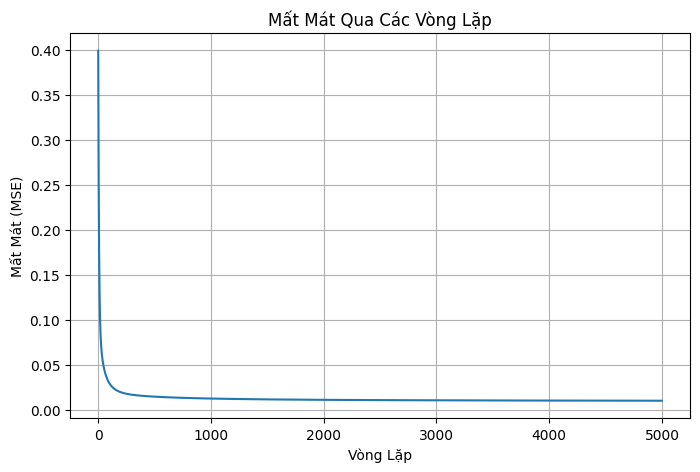

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(gd_model.loss_history)
plt.title("Mất Mát Qua Các Vòng Lặp")
plt.xlabel("Vòng Lặp")
plt.ylabel("Mất Mát (MSE)")
plt.grid(True)
plt.show()


### Biểu đồ giá trị thực so với giá trị dự đoán

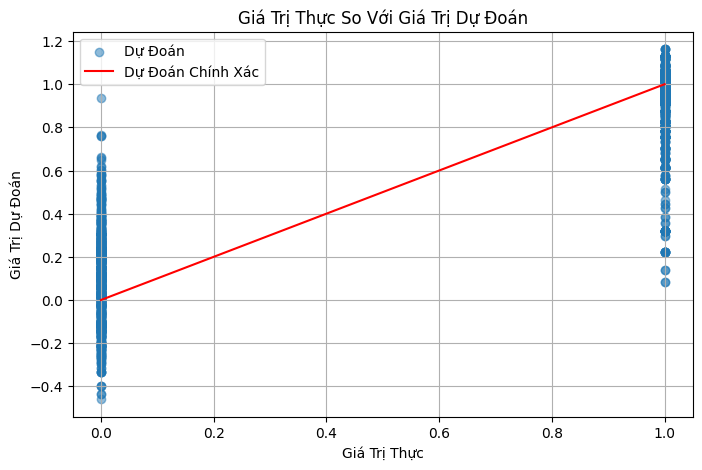

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(labels, predictions, label='Dự Đoán', alpha=0.5)
plt.plot([min(labels), max(labels)], [min(labels), max(labels)], color='red', label='Dự Đoán Chính Xác')  # Đường cho dự đoán chính xác
plt.title("Giá Trị Thực So Với Giá Trị Dự Đoán")
plt.xlabel("Giá Trị Thực")
plt.ylabel("Giá Trị Dự Đoán")
plt.legend()
plt.grid(True)
plt.show()


### Ma trận nhầm lẫn

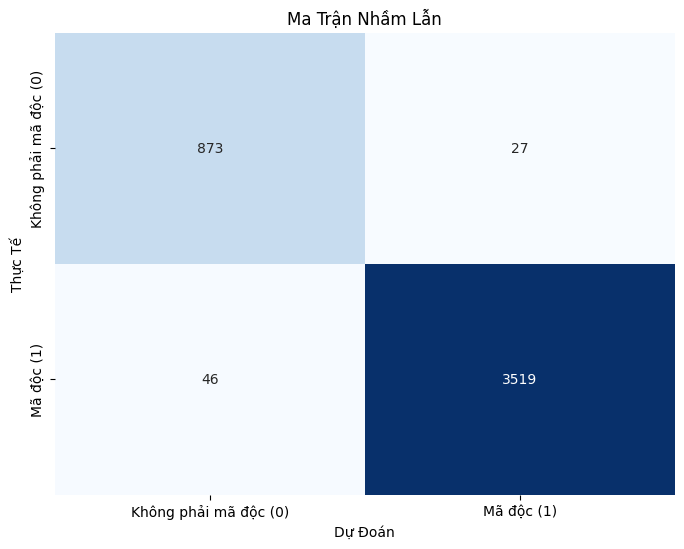

In [8]:

# Bước 1: Chuyển đổi dự đoán thành nhãn nhị phân
threshold = 0.5  # Ngưỡng để phân loại
predictions_binary = (predictions >= threshold).astype(int)

# Bước 2: Tạo ma trận nhầm lẫn
cm = confusion_matrix(labels, predictions_binary)

# Bước 3: Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Không phải mã độc (0)', 'Mã độc (1)'], 
            yticklabels=['Không phải mã độc (0)', 'Mã độc (1)'])
plt.title("Ma Trận Nhầm Lẫn")
plt.xlabel("Dự Đoán")
plt.ylabel("Thực Tế")
plt.show()


## 8. Kết Luận
Mô hình Gradient Descent được xây dựng trong báo cáo này đã đạt được hiệu suất đáng kể trong việc dự đoán mã độc. Các chỉ số đánh giá cho thấy mô hình có khả năng phân loại tốt và có thể được cải thiện thêm trong tương lai bằng cách điều chỉnh các tham số và áp dụng các phương pháp nâng cao hơn. Việc trực quan hóa kết quả cũng giúp chúng ta hiểu rõ hơn về khả năng của mô hình trong việc dự đoán các nhãn thực tế.



# NGhich

In [9]:
class GradientDescent:
    def __init__(self, learning_rate=0.01, num_iterations=1000, batch_size=None, momentum=False, beta=0.9, epsilon=1e-8, adam=False, beta1=0.9, beta2=0.999):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.batch_size = batch_size  # Để xác định mini-batch size
        self.momentum = momentum  # Cho phương pháp Momentum-based GD
        self.beta = beta  # Hệ số momentum
        self.epsilon = epsilon  # Cho Adam
        self.adam = adam  # Bật chế độ Adam
        self.beta1 = beta1  # Tham số beta1 cho Adam
        self.beta2 = beta2  # Tham số beta2 cho Adam
        self.theta = None
        self.loss_history = []
        self.v = None  # Tốc độ cho Momentum-based GD
        self.m = None  # Moment 1 cho Adam
        self.v_adam = None  # Moment 2 cho Adam
        self.t = 0  # Đặt `t` ở ngoài để tránh lỗi

    def _compute_loss(self, predictions, y):
        """Tính toán mất mát (MSE)."""
        errors = predictions - y
        return (1 / (2 * len(y))) * np.dot(errors.T, errors)

    def _gradient(self, X, y, predictions):
        """Tính toán gradient."""
        m = len(y)
        return (1 / m) * np.dot(X.T, (predictions - y))

    def fit(self, X, y):
        """Huấn luyện mô hình bằng cách tối ưu hóa trọng số theo từng thuật toán."""
        m, n = X.shape
        self.theta = np.zeros(n)  # Khởi tạo trọng số
        self.loss_history = []

        if self.momentum:
            self.v = np.zeros(n)  # Khởi tạo vận tốc cho Momentum-based GD

        if self.adam:
            self.m = np.zeros(n)  # Khởi tạo moment đầu tiên cho Adam
            self.v_adam = np.zeros(n)  # Khởi tạo moment thứ hai cho Adam

        for i in range(self.num_iterations):
            if self.batch_size is None:
                # Batch Gradient Descent
                predictions = np.dot(X, self.theta)
                gradients = self._gradient(X, y, predictions)
            else:
                # Mini-Batch hoặc Stochastic Gradient Descent
                indices = np.random.permutation(m)
                for j in range(0, m, self.batch_size):
                    end = j + self.batch_size
                    X_batch = X[indices[j:end]]
                    y_batch = y[indices[j:end]]
                    predictions_batch = np.dot(X_batch, self.theta)
                    gradients = self._gradient(X_batch, y_batch, predictions_batch)

                    if self.momentum:
                        # Momentum-based Gradient Descent
                        self.v = self.beta * self.v + (1 - self.beta) * gradients
                        self.theta -= self.learning_rate * self.v
                    elif self.adam:
                        # Adam Optimizer
                        self.t += 1  # Cập nhật `t` cho Adam
                        self.m = self.beta1 * self.m + (1 - self.beta1) * gradients
                        self.v_adam = self.beta2 * self.v_adam + (1 - self.beta2) * (gradients ** 2)

                        m_hat = self.m / (1 - self.beta1 ** self.t)  # Corrected moment 1
                        v_hat = self.v_adam / (1 - self.beta2 ** self.t)  # Corrected moment 2

                        self.theta -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
                    else:
                        # Normal Mini-Batch Gradient Descent or SGD
                        self.theta -= self.learning_rate * gradients

            # Batch or Mini-Batch loss
            loss = self._compute_loss(np.dot(X, self.theta), y)
            self.loss_history.append(loss)

            if i % 100 == 0:
                print(f"Vòng lặp {i}: Mất mát = {loss:.4f}")

    def predict(self, X):
        """Dự đoán giá trị bằng mô hình đã được huấn luyện."""
        return np.dot(X, self.theta)

    def evaluate(self, y_true, y_pred):
        """Đánh giá mô hình bằng các chỉ số R-squared, MAE, MSE."""
        ss_res = np.sum((y_true - y_pred) ** 2)  # Tổng bình phương phần dư
        ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)  # Tổng bình phương toàn phần
        r2 = 1 - (ss_res / ss_tot)

        mae = np.mean(np.abs(y_true - y_pred))  # Lỗi tuyệt đối trung bình (MAE)
        mse = np.mean((y_true - y_pred) ** 2)  # Lỗi bình phương trung bình (MSE)

        return r2, mae, mse


In [10]:
class BatchGradientDescent(GradientDescent):
    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        self.loss_history = []

        for i in range(self.num_iterations):
            predictions = np.dot(X, self.theta)
            gradients = self._gradient(X, y, predictions)

            self.theta -= self.learning_rate * gradients
            loss = self._compute_loss(predictions, y)
            self.loss_history.append(loss)

            if i % 100 == 0:
                print(f"Vòng lặp {i}: Mất mát = {loss:.4f}")


In [11]:
class StochasticGradientDescent(GradientDescent):
    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        self.loss_history = []

        for i in range(self.num_iterations):
            for j in range(m):
                X_i = X[j].reshape(1, -1)
                y_i = y[j].reshape(1, -1)
                predictions = np.dot(X_i, self.theta)
                gradients = self._gradient(X_i, y_i, predictions)

                self.theta -= self.learning_rate * gradients

            loss = self._compute_loss(np.dot(X, self.theta), y)
            self.loss_history.append(loss)

            if i % 100 == 0:
                print(f"Vòng lặp {i}: Mất mát = {loss:.4f}")


In [12]:
class MiniBatchGradientDescent(GradientDescent):
    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        self.loss_history = []

        for i in range(self.num_iterations):
            indices = np.random.permutation(m)
            for j in range(0, m, self.batch_size):
                end = j + self.batch_size
                X_batch = X[indices[j:end]]
                y_batch = y[indices[j:end]]

                predictions = np.dot(X_batch, self.theta)
                gradients = self._gradient(X_batch, y_batch, predictions)

                self.theta -= self.learning_rate * gradients

            loss = self._compute_loss(np.dot(X, self.theta), y)
            self.loss_history.append(loss)

            if i % 100 == 0:
                print(f"Vòng lặp {i}: Mất mát = {loss:.4f}")


In [13]:
class MomentumGradientDescent(GradientDescent):
    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        self.loss_history = []
        self.v = np.zeros(n)

        for i in range(self.num_iterations):
            predictions = np.dot(X, self.theta)
            gradients = self._gradient(X, y, predictions)

            self.v = self.beta * self.v + (1 - self.beta) * gradients
            self.theta -= self.learning_rate * self.v

            loss = self._compute_loss(np.dot(X, self.theta), y)
            self.loss_history.append(loss)

            if i % 100 == 0:
                print(f"Vòng lặp {i}: Mất mát = {loss:.4f}")


In [14]:
class AdamOptimizer(GradientDescent):
    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)
        self.loss_history = []
        self.m = np.zeros(n)
        self.v_adam = np.zeros(n)
        t = 0

        for i in range(self.num_iterations):
            predictions = np.dot(X, self.theta)
            gradients = self._gradient(X, y, predictions)

            t += 1
            self.m = self.beta1 * self.m + (1 - self.beta1) * gradients
            self.v_adam = self.beta2 * self.v_adam + (1 - self.beta2) * (gradients ** 2)

            m_hat = self.m / (1 - self.beta1 ** t)
            v_hat = self.v_adam / (1 - self.beta2 ** t)

            self.theta -= self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)

            loss = self._compute_loss(np.dot(X, self.theta), y)
            self.loss_history.append(loss)

            if i % 100 == 0:
                print(f"Vòng lặp {i}: Mất mát = {loss:.4f}")


In [15]:
# Tách nhãn (labels)
y = labels  # 'labels' là cột cuối cùng đã được tách trong bước tiền xử lý

# Batch Gradient Descent
print("Batch Gradient Descent:")
gd_model_batch = GradientDescent(learning_rate=0.01, num_iterations=1000)
gd_model_batch.fit(X, y)
y_pred_batch = gd_model_batch.predict(X)
r2_batch, mae_batch, mse_batch = gd_model_batch.evaluate(y, y_pred_batch)
print(f"R2: {r2_batch:.4f}, MAE: {mae_batch:.4f}, MSE: {mse_batch:.4f}\n")

# Stochastic Gradient Descent (SGD)
print("Stochastic Gradient Descent (SGD):")
gd_model_sgd = GradientDescent(learning_rate=0.01, num_iterations=1000, batch_size=1)
gd_model_sgd.fit(X, y)
y_pred_sgd = gd_model_sgd.predict(X)
r2_sgd, mae_sgd, mse_sgd = gd_model_sgd.evaluate(y, y_pred_sgd)
print(f"R2: {r2_sgd:.4f}, MAE: {mae_sgd:.4f}, MSE: {mse_sgd:.4f}\n")

# Mini-Batch Gradient Descent
print("Mini-Batch Gradient Descent:")
gd_model_mini_batch = GradientDescent(learning_rate=0.01, num_iterations=1000, batch_size=32)
gd_model_mini_batch.fit(X, y)
y_pred_mini_batch = gd_model_mini_batch.predict(X)
r2_mini_batch, mae_mini_batch, mse_mini_batch = gd_model_mini_batch.evaluate(y, y_pred_mini_batch)
print(f"R2: {r2_mini_batch:.4f}, MAE: {mae_mini_batch:.4f}, MSE: {mse_mini_batch:.4f}\n")

# Momentum-based Gradient Descent
print("Momentum-based Gradient Descent:")
gd_model_momentum = GradientDescent(learning_rate=0.01, num_iterations=1000, momentum=True, beta=0.9)
gd_model_momentum.fit(X, y)
y_pred_momentum = gd_model_momentum.predict(X)
r2_momentum, mae_momentum, mse_momentum = gd_model_momentum.evaluate(y, y_pred_momentum)
print(f"R2: {r2_momentum:.4f}, MAE: {mae_momentum:.4f}, MSE: {mse_momentum:.4f}\n")

# Adam Optimizer
print("Adam Optimizer:")
gd_model_adam = GradientDescent(learning_rate=0.01, num_iterations=1000, adam=True)
gd_model_adam.fit(X, y)
y_pred_adam = gd_model_adam.predict(X)
r2_adam, mae_adam, mse_adam = gd_model_adam.evaluate(y, y_pred_adam)
print(f"R2: {r2_adam:.4f}, MAE: {mae_adam:.4f}, MSE: {mse_adam:.4f}\n")


Batch Gradient Descent:
Vòng lặp 0: Mất mát = 0.3992
Vòng lặp 100: Mất mát = 0.3992
Vòng lặp 200: Mất mát = 0.3992
Vòng lặp 300: Mất mát = 0.3992
Vòng lặp 400: Mất mát = 0.3992
Vòng lặp 500: Mất mát = 0.3992
Vòng lặp 600: Mất mát = 0.3992
Vòng lặp 700: Mất mát = 0.3992
Vòng lặp 800: Mất mát = 0.3992
Vòng lặp 900: Mất mát = 0.3992
R2: -3.9611, MAE: 0.7984, MSE: 0.7984

Stochastic Gradient Descent (SGD):
Vòng lặp 0: Mất mát = 0.0106
Vòng lặp 100: Mất mát = 0.0089
Vòng lặp 200: Mất mát = 0.0091
Vòng lặp 300: Mất mát = 0.0086
Vòng lặp 400: Mất mát = 0.0085
Vòng lặp 500: Mất mát = 0.0090
Vòng lặp 600: Mất mát = 0.0086
Vòng lặp 700: Mất mát = 0.0087
Vòng lặp 800: Mất mát = 0.0087
Vòng lặp 900: Mất mát = 0.0096
R2: 0.8937, MAE: 0.0669, MSE: 0.0171

Mini-Batch Gradient Descent:
Vòng lặp 0: Mất mát = 0.0235
Vòng lặp 100: Mất mát = 0.0095
Vòng lặp 200: Mất mát = 0.0092
Vòng lặp 300: Mất mát = 0.0091
Vòng lặp 400: Mất mát = 0.0090
Vòng lặp 500: Mất mát = 0.0089
Vòng lặp 600: Mất mát = 0.0089
Vòng

Batch Gradient Descent:
Độ Chính Xác: 0.2016


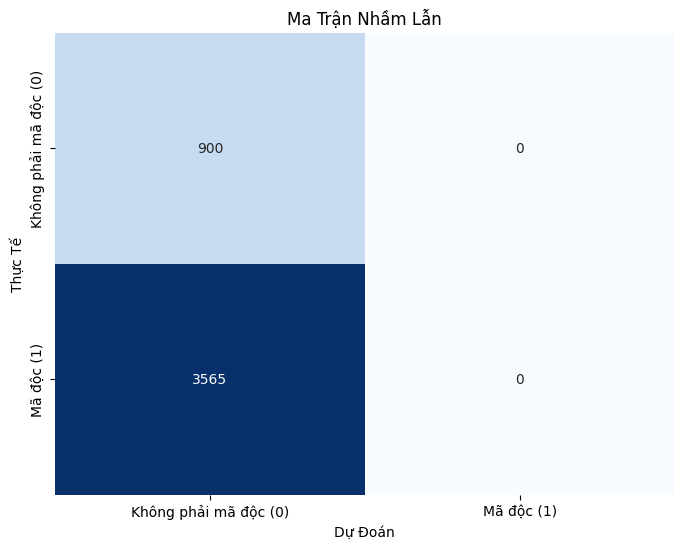


Stochastic Gradient Descent:
Độ Chính Xác: 0.9850


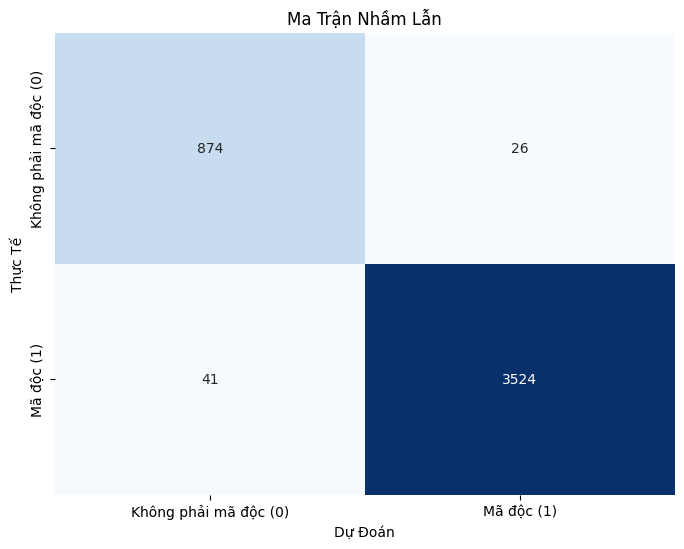


Mini-Batch Gradient Descent:
Độ Chính Xác: 0.9852


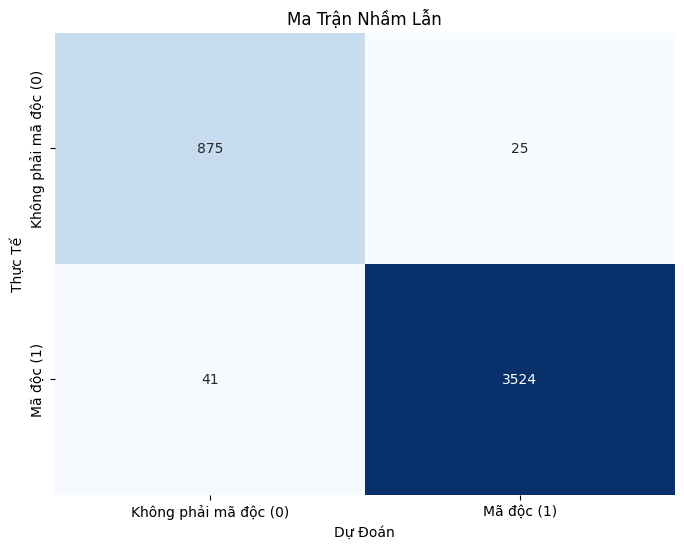


Momentum-based Gradient Descent:
Độ Chính Xác: 0.2016


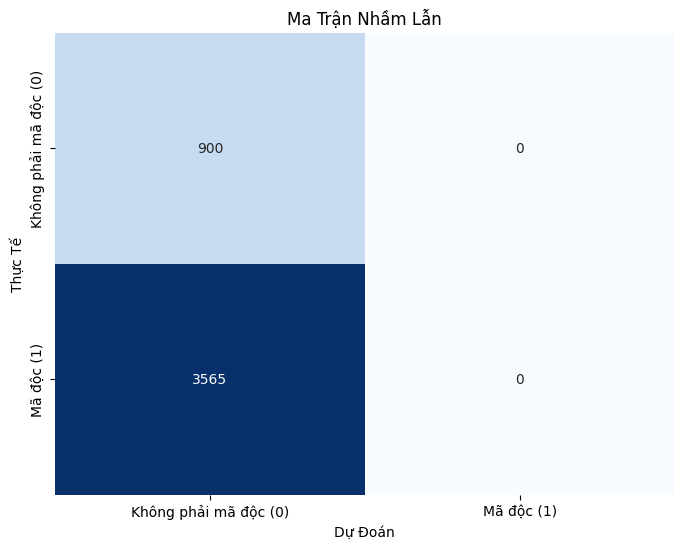


Adam Optimizer:
Độ Chính Xác: 0.2016


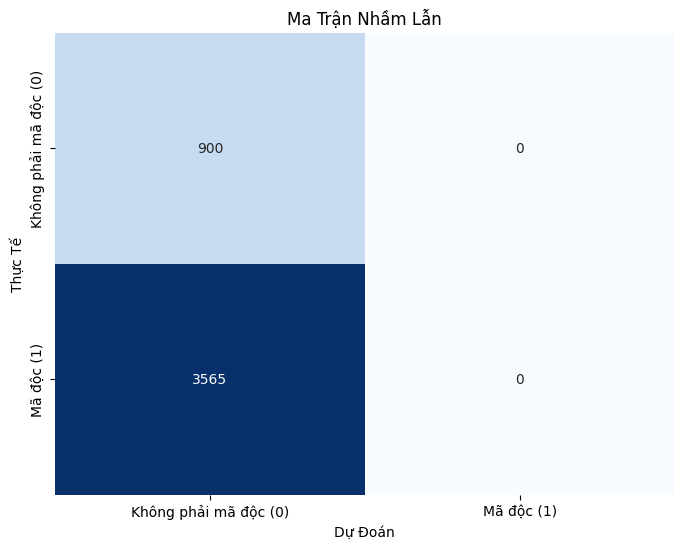

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Hàm vẽ ma trận nhầm lẫn
def plot_confusion_matrix(y_true, y_pred, title="Ma Trận Nhầm Lẫn"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Không phải mã độc (0)', 'Mã độc (1)'], 
                yticklabels=['Không phải mã độc (0)', 'Mã độc (1)'])
    plt.title(title)
    plt.xlabel("Dự Đoán")
    plt.ylabel("Thực Tế")
    plt.show()

# Hàm đánh giá mô hình: tính accuracy và vẽ ma trận nhầm lẫn
def evaluate_model(y_true, y_pred, threshold=0.5):
    # Chuyển đổi dự đoán thành nhãn nhị phân
    y_pred_binary = (y_pred >= threshold).astype(int)
    
    # Tính toán độ chính xác
    accuracy = accuracy_score(y_true, y_pred_binary)
    
    # In độ chính xác
    print(f"Độ Chính Xác: {accuracy:.4f}")
    
    # Vẽ ma trận nhầm lẫn
    plot_confusion_matrix(y_true, y_pred_binary)

# Dự đoán và đánh giá từng mô hình

# Batch Gradient Descent
print("Batch Gradient Descent:")
predictions_batch = gd_model_batch.predict(X)
evaluate_model(y, predictions_batch)

# Stochastic Gradient Descent
print("\nStochastic Gradient Descent:")
predictions_sgd = gd_model_sgd.predict(X)
evaluate_model(y, predictions_sgd)

# Mini-Batch Gradient Descent
print("\nMini-Batch Gradient Descent:")
predictions_mini_batch = gd_model_mini_batch.predict(X)
evaluate_model(y, predictions_mini_batch)

# Momentum-based Gradient Descent
print("\nMomentum-based Gradient Descent:")
predictions_momentum = gd_model_momentum.predict(X)
evaluate_model(y, predictions_momentum)

# Adam Optimizer
print("\nAdam Optimizer:")
predictions_adam = gd_model_adam.predict(X)
evaluate_model(y, predictions_adam)
